In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.shape

(891, 12)

In [118]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
 df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [88]:
491/(491+216+184)

0.5510662177328844

In [89]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [114]:
women = df[df['Sex']==0]
women.shape
w1 = women[women['Survived']==1]
w1.shape

(233, 12)

In [115]:
men = df[df['Sex']==1]
w1 = men[men['Survived']==1]
w1.shape

(109, 12)

In [116]:
print(109/577)
print(233/314)

0.18890814558058924
0.7420382165605095


<AxesSubplot:>

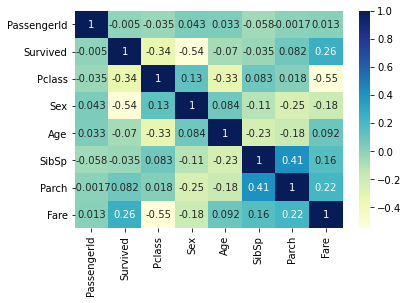

In [60]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

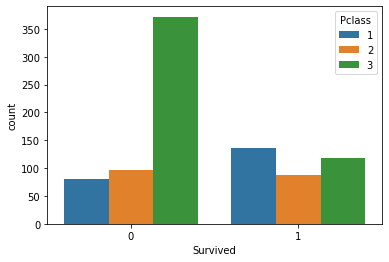

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

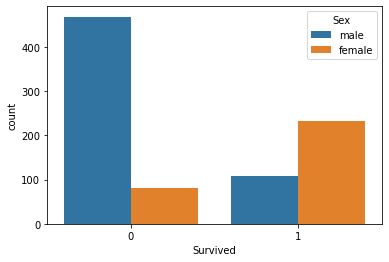

In [49]:
sns.countplot(x='Survived',hue='Sex',data=df)

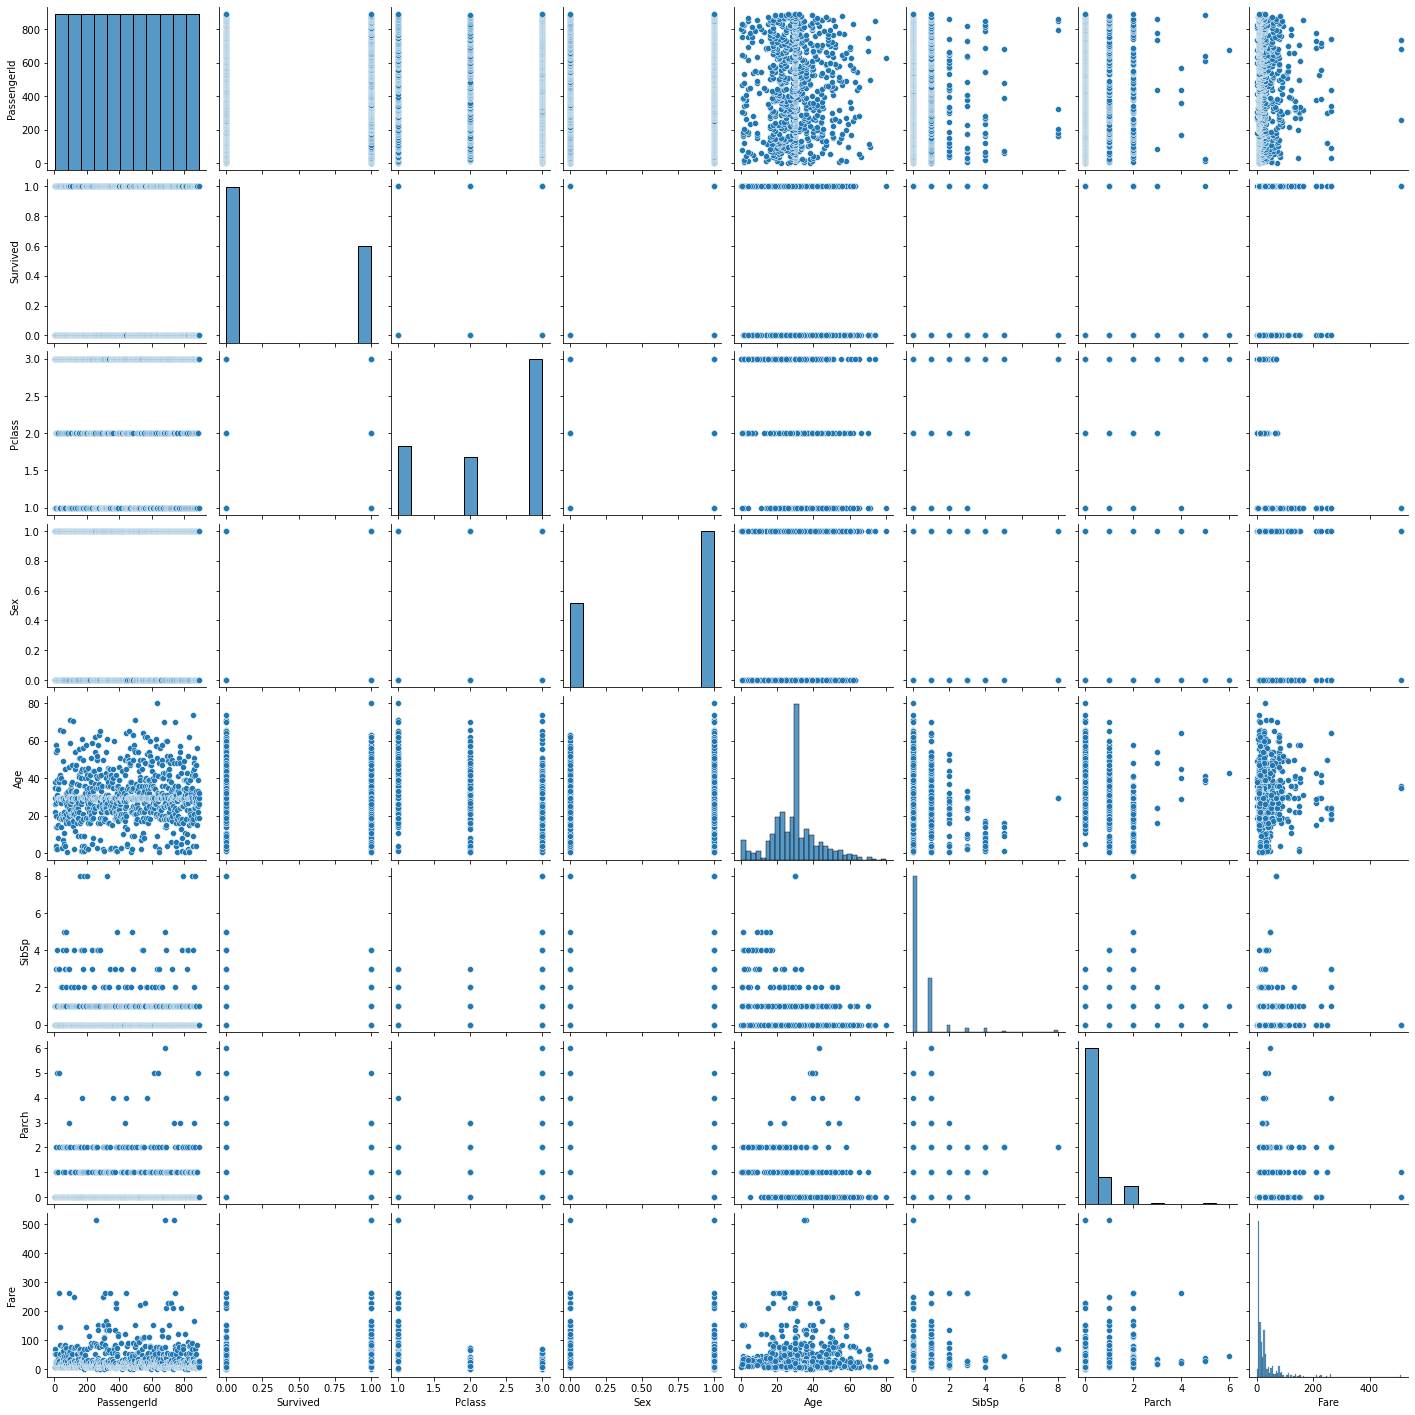

In [13]:
sns.pairplot(df)

(array([519., 197.,  55.,  47.,  20.,  15.,   7.,   9.,   2.,   0.,   5.,
          4.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([  0.      ,  20.493168,  40.986336,  61.479504,  81.972672,
        102.46584 , 122.959008, 143.452176, 163.945344, 184.438512,
        204.93168 , 225.424848, 245.918016, 266.411184, 286.904352,
        307.39752 , 327.890688, 348.383856, 368.877024, 389.370192,
        409.86336 , 430.356528, 450.849696, 471.342864, 491.836032,
        512.3292  ]),
 <BarContainer object of 25 artists>)

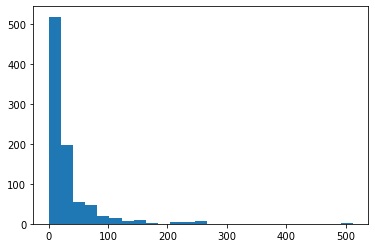

In [14]:
plt.hist(df['Fare'],bins=25)

In [33]:
df.drop(['Cabin','Embarked','SibSp','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,male,22.0,0,7.2500
1,1,1,female,38.0,0,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,0,53.1000
4,0,3,male,35.0,0,8.0500


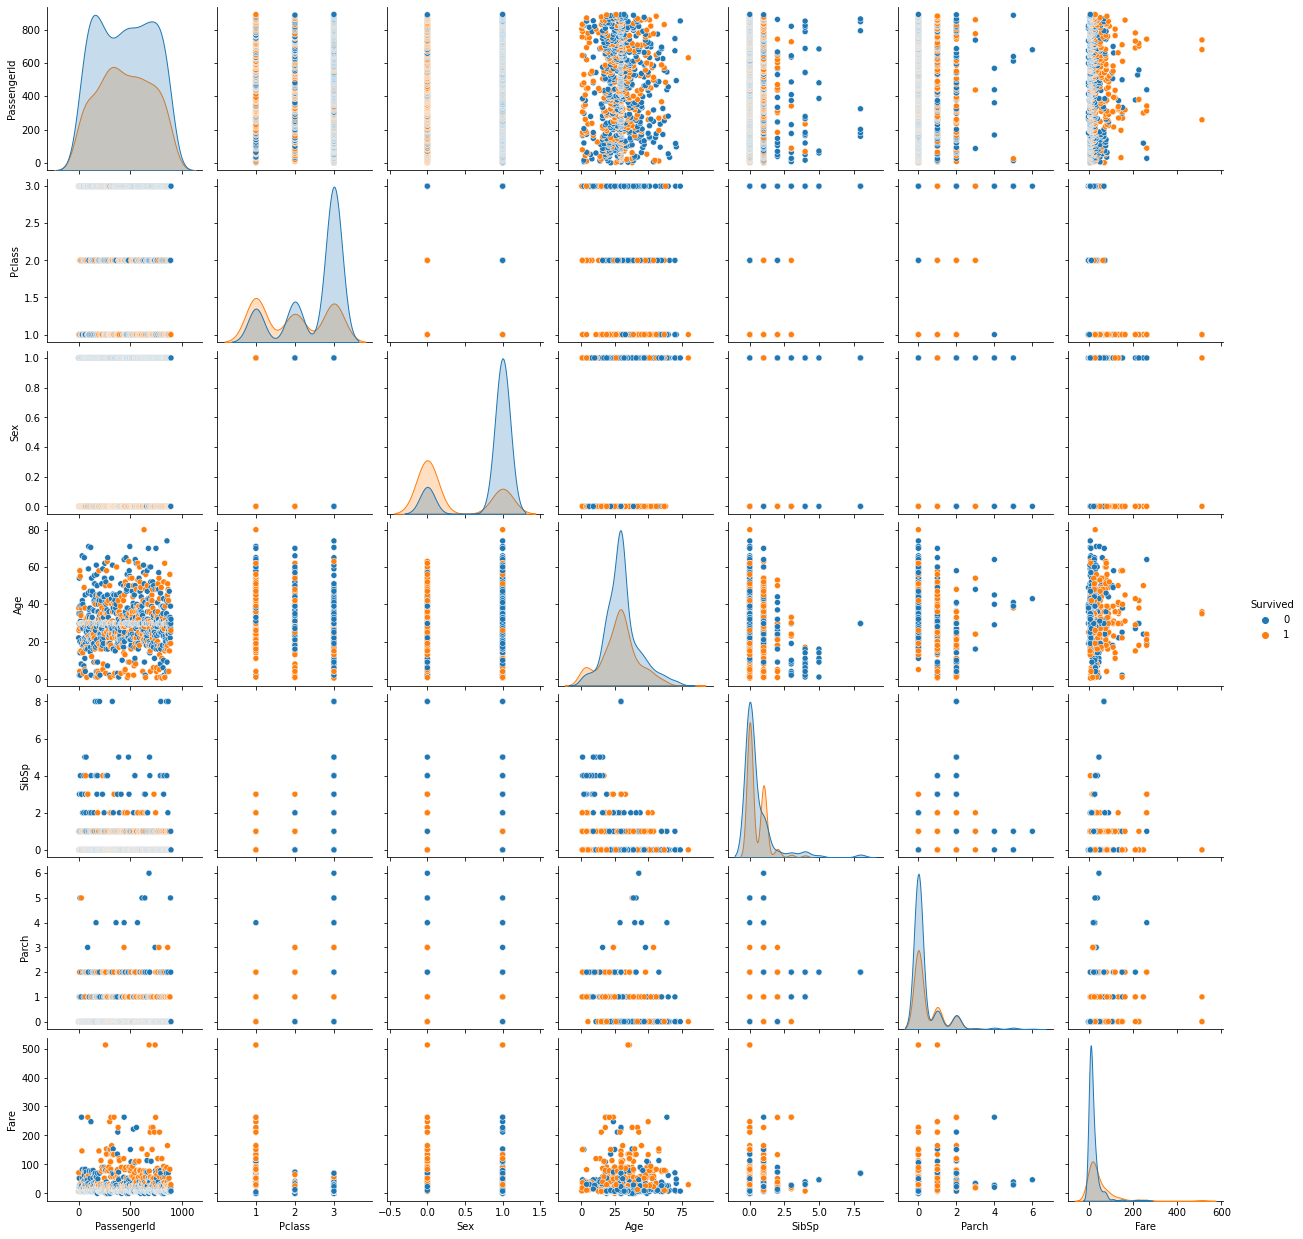

In [61]:
sns.pairplot(data=df,hue='Survived')

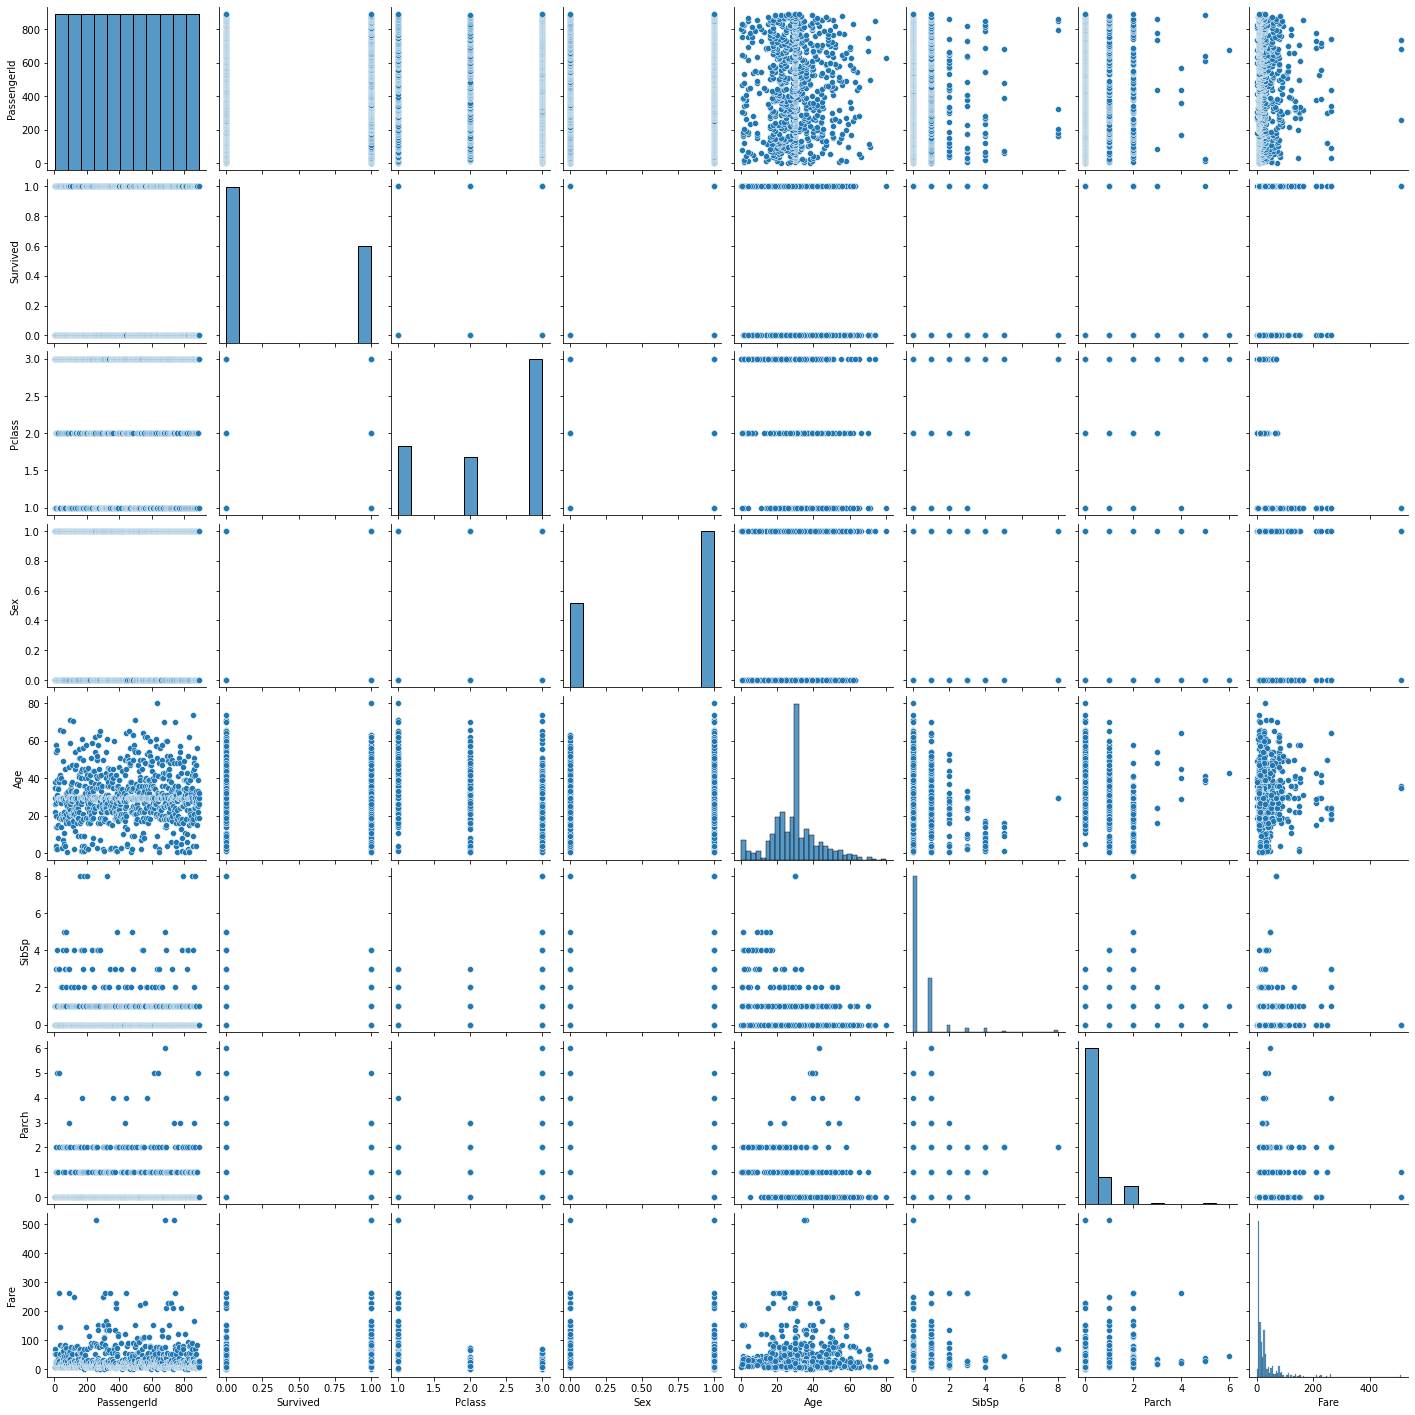

In [63]:
sns.pairplot(df)

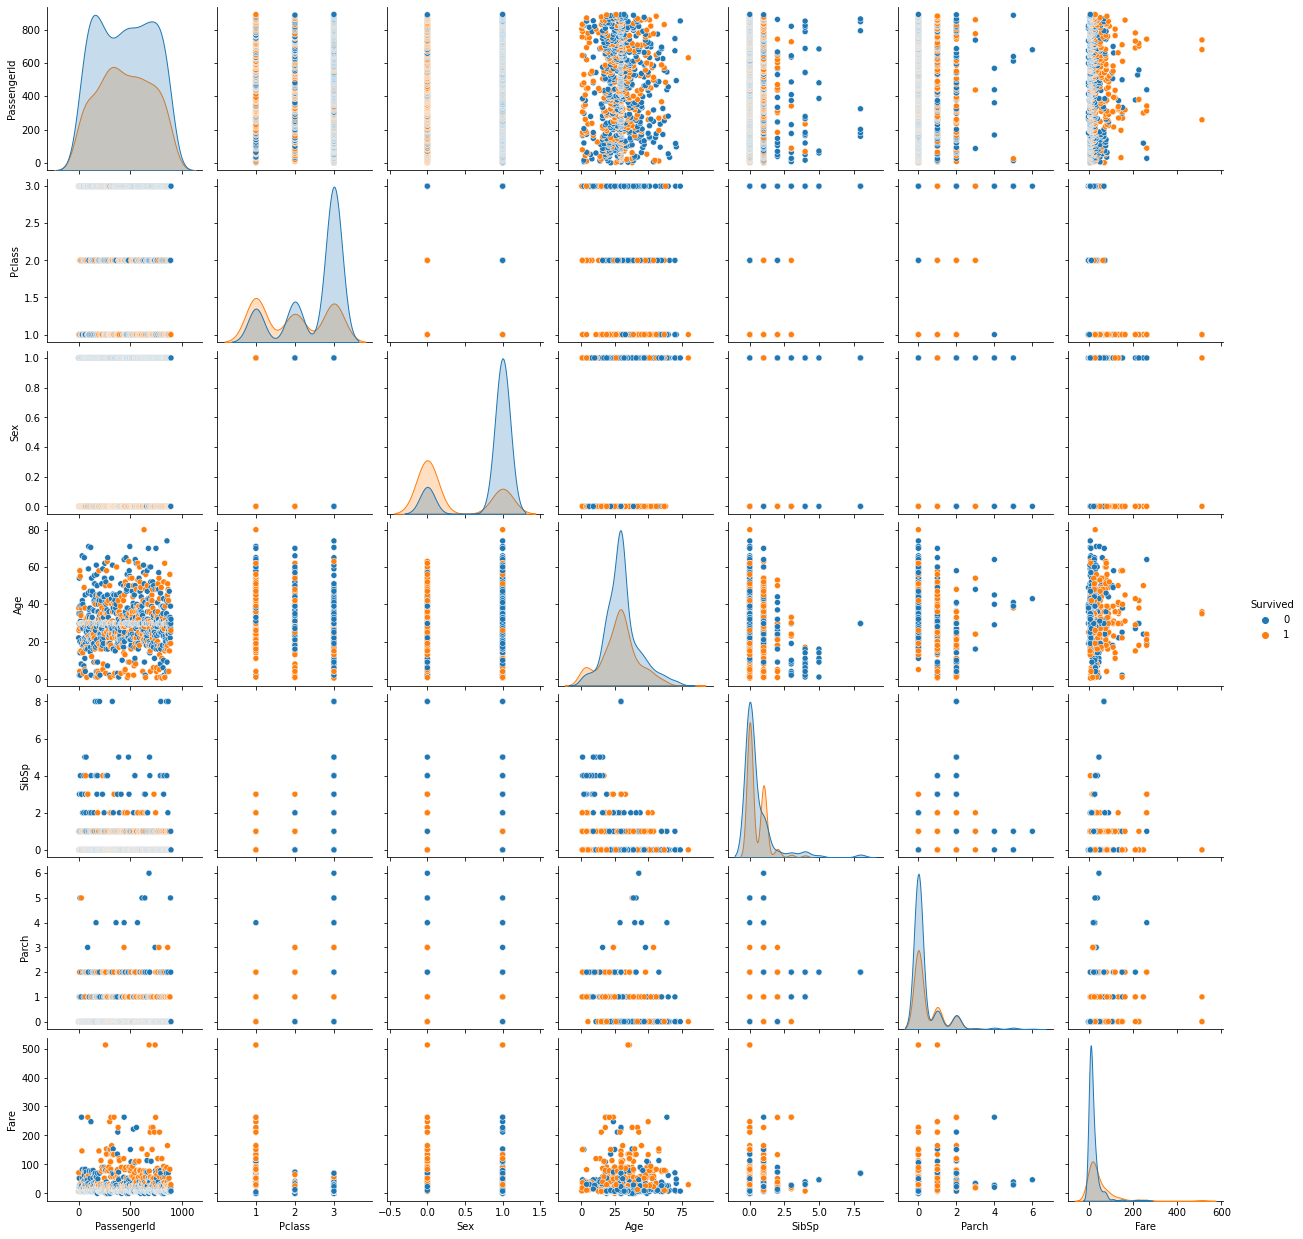

In [64]:
sns.pairplot(data=df,hue='Survived')

<AxesSubplot:>

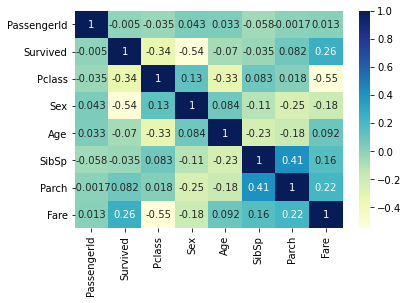

In [65]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

<AxesSubplot:xlabel='Age'>

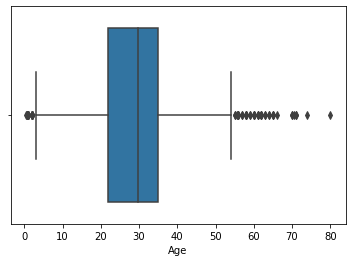

In [66]:
 sns.boxplot(x='Age',data=df)

<AxesSubplot:xlabel='Fare'>

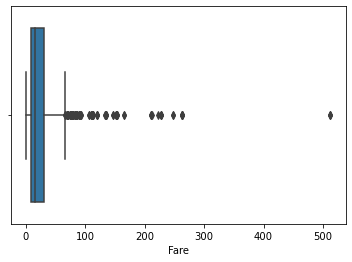

In [67]:
sns.boxplot(x='Fare',data=df)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

Text(0.5, 1.0, 'Male')

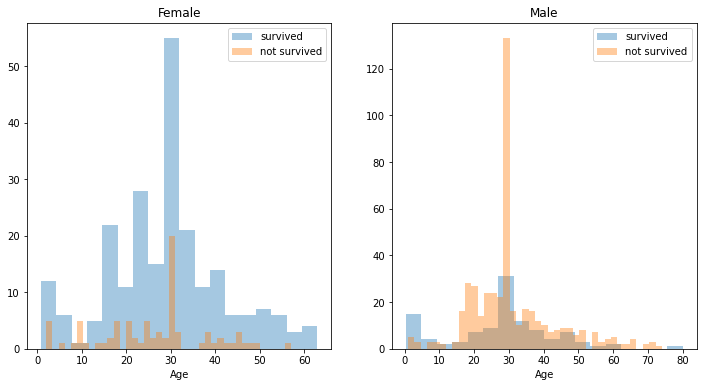

In [91]:
women = df[df['Sex']==0]
men = df[df['Sex']==1]
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax = sns.distplot(women[women['Survived']==1].Age,bins=18,label='survived',ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived']==0].Age,bins=40,label='not survived',ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age,bins=18,label='survived',ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived']==0].Age,bins=40,label='not survived',ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Survived'>

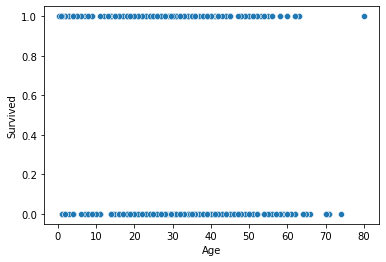

In [69]:
sns.scatterplot(df.Age,df.Survived)

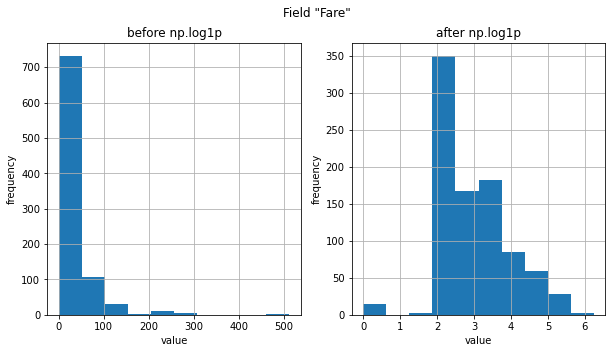

In [70]:
field = "Fare"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [71]:
df['Fare'] = df['Fare'].apply(np.log1p)

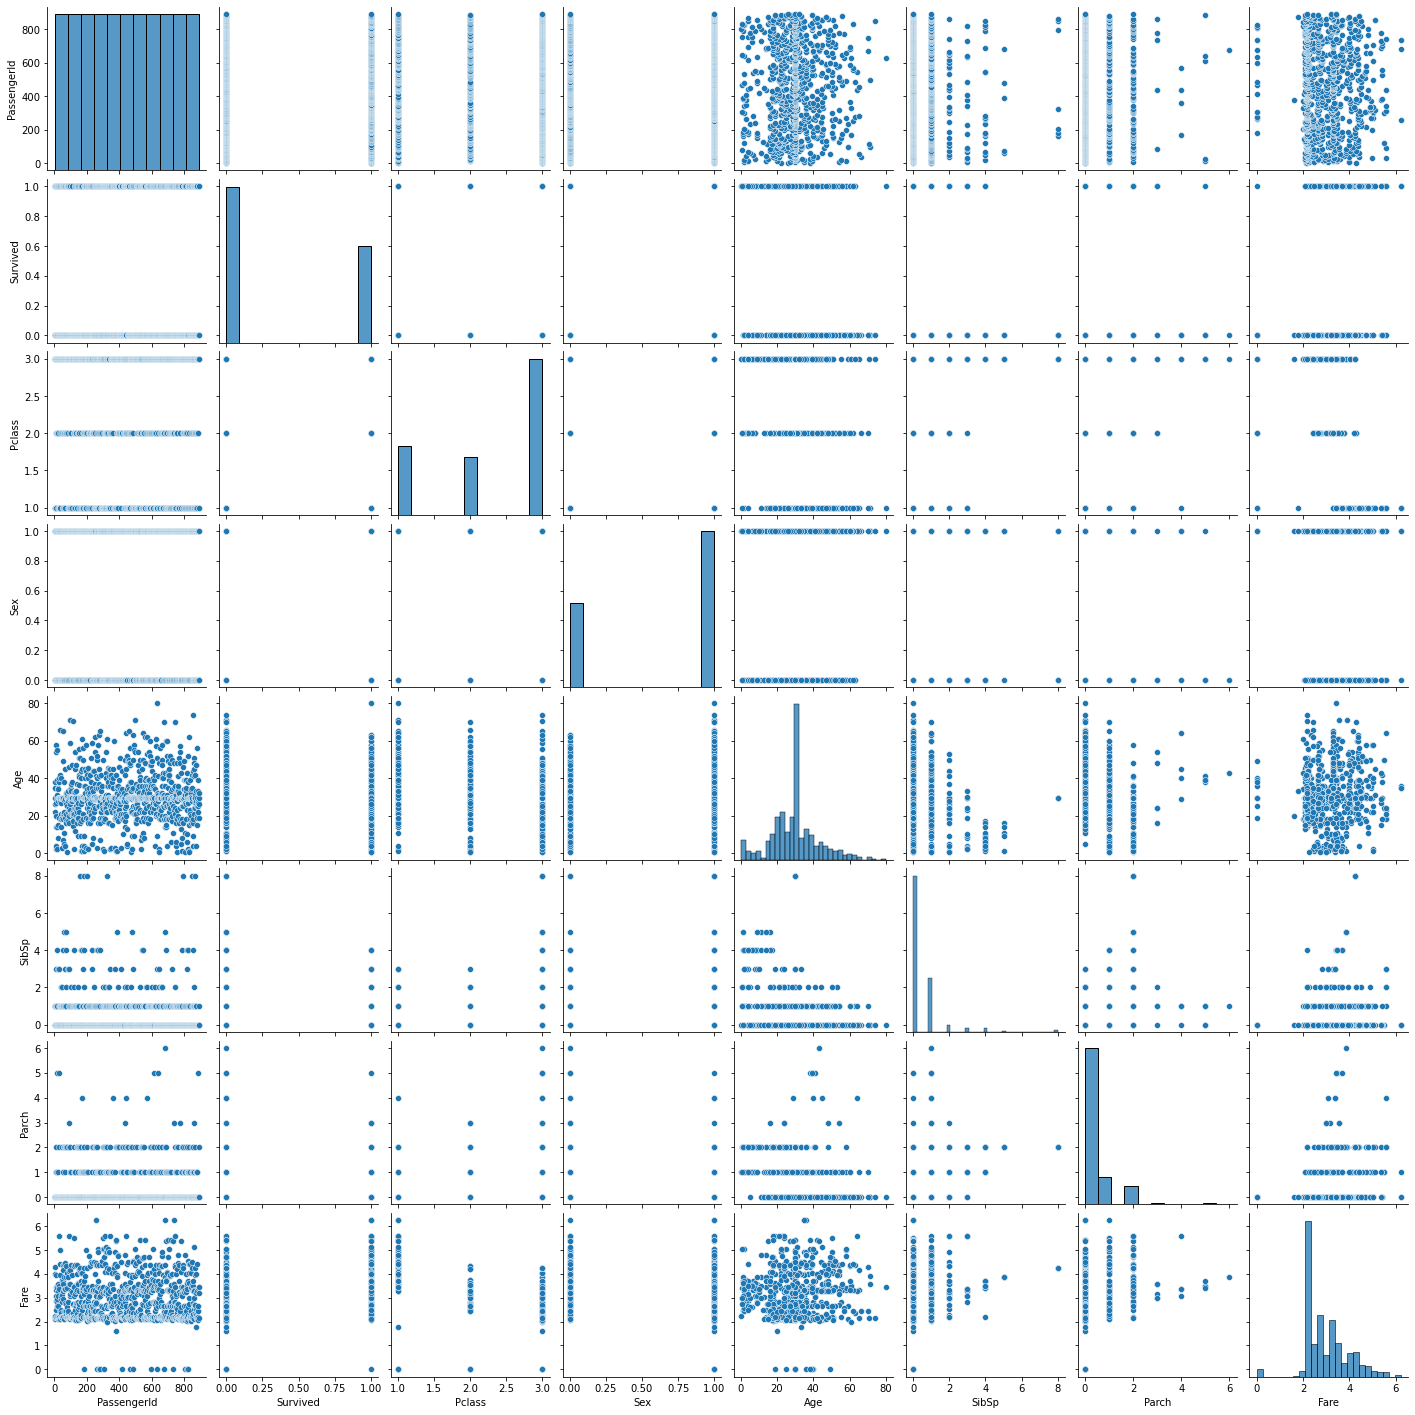

In [72]:
sns.pairplot(df)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


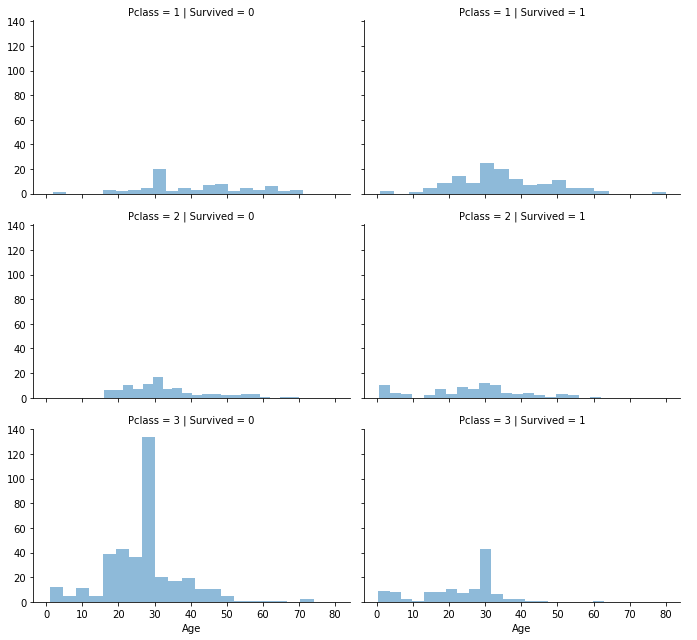

In [83]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=3, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();